In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [344]:
filePath = "C:/Users/adamv/Desktop/Zoo-Animal-Classification-ML/archive/zoo_data-1.csv"
Zoo_dataset = pd.read_csv(filePath)
Zoo_dataset.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [345]:
Zoo_dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [346]:
Zoo_dataset.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
dtype: int64

Text(0.5, 1.0, 'Count of each animal type')

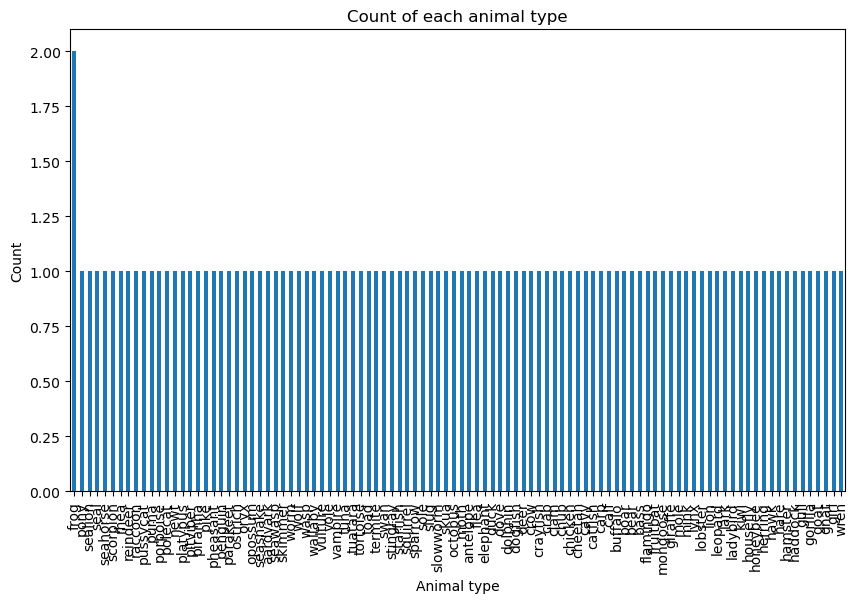

In [347]:
Zoo_dataset['animal_name'].value_counts().plot(kind = 'bar', figsize=(10,6))

plt.xlabel('Animal type')
plt.ylabel('Count')
plt.title ('Count of each animal type')

Text(0.5, 1.0, 'Feature Correlation Matrix')

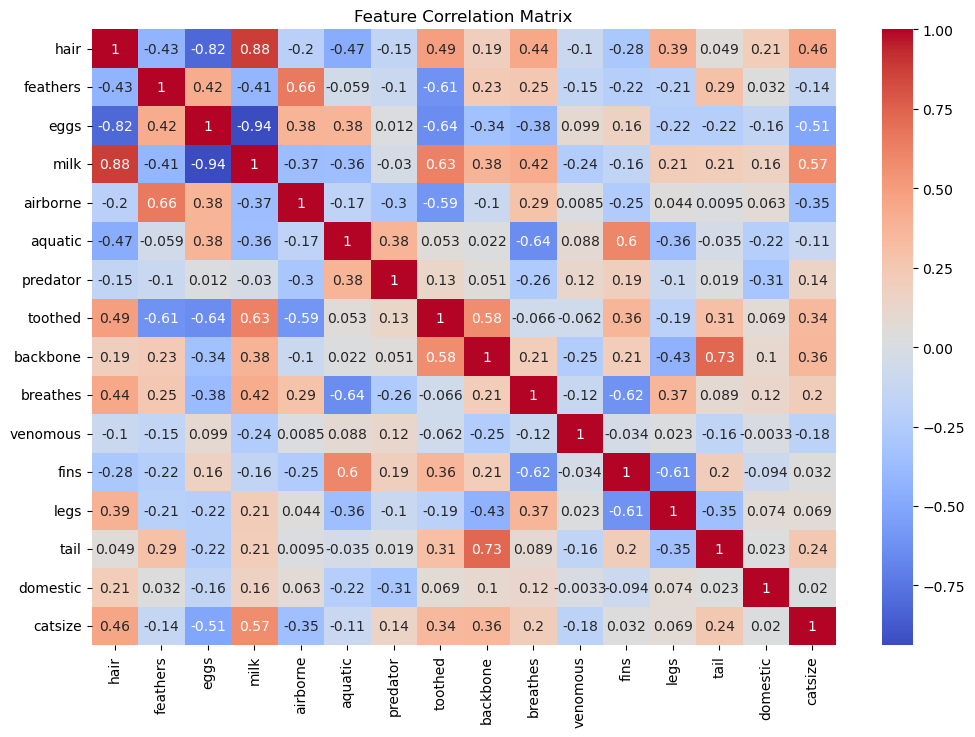

In [348]:
import seaborn as sns
plt.figure(figsize = (12,8))
sns.heatmap(Zoo_dataset.drop('animal_name', axis = 1).corr(), annot = True, cmap = 'coolwarm')
plt.title('Feature Correlation Matrix')

In [349]:
X = Zoo_dataset.drop('animal_name', axis=1)
print(X)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [350]:
y = Zoo_dataset['animal_name']

In [351]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [352]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [353]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [354]:
model = knn.fit(X_train, y_train)

In [355]:
y_pred = knn.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

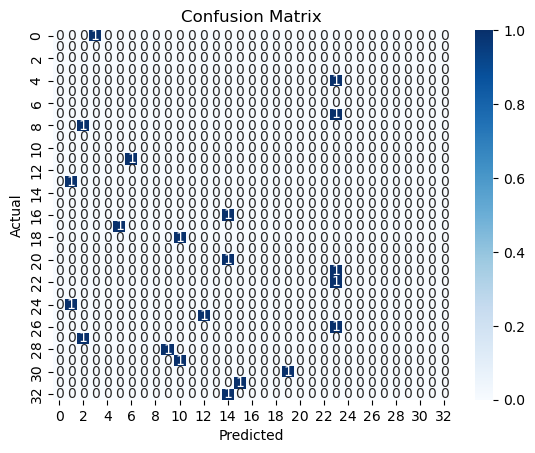

In [356]:
from sklearn.metrics import confusion_matrix , classification_report

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [357]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    aardvark       0.00      0.00      0.00       1.0
    antelope       0.00      0.00      0.00       0.0
        bass       0.00      0.00      0.00       0.0
        bear       0.00      0.00      0.00       0.0
        boar       0.00      0.00      0.00       1.0
        calf       0.00      0.00      0.00       0.0
     catfish       0.00      0.00      0.00       0.0
     cheetah       0.00      0.00      0.00       1.0
        chub       0.00      0.00      0.00       1.0
        clam       0.00      0.00      0.00       0.0
        crow       0.00      0.00      0.00       0.0
     dogfish       0.00      0.00      0.00       1.0
     dolphin       0.00      0.00      0.00       0.0
    elephant       0.00      0.00      0.00       1.0
        flea       0.00      0.00      0.00       0.0
    fruitbat       0.00      0.00      0.00       0.0
        gnat       0.00      0.00      0.00       1.0
        goat       0.00    

C:\Users\adamv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamv\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adamv\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [358]:
X_new = scaler.transform([[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1]])  # Example data, adjust accordingly
predicted_animal_type = knn.predict(X_new)
print("Predicted Animal Type:", predicted_animal_type)

Predicted Animal Type: ['flamingo']


C:\Users\adamv\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [359]:
import pickle as pkl

pkl.dump(model,open('model.pkl', 'wb'))